In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


diff2 = np.array([2.909090909,-0.363636364,-1.272727273,-0.636363636,-1.818181818,-0.272727273,-0.909090909,-1.181818182,-3.090909091,-1.454545455,-0.181818182,-1.636363636,0.272727273,0.363636364,-1.636363636,-0.090909091,1.363636364,0.272727273,-0.272727273,-0.818181818,-2.363636364,-0.090909091,-3])
diff1 = np.array([1.166909091,0.709,-1.088909091,0.090272727,0.276090909,1.39054546,-0.36363637,-1.00754546,-1.290272728,0.973454545,0.818181818,-0.45454545,1.351454542,0.44645454,0.378999996,-1.414454545,1.085454545,1.072,0.917636361,1.01036364,-0.853909091,0.106181818,-0.463363636])

# 计算 Cohen's d（标准化效应量）
# 公式：d = 均值 / 标准差

def cohens_d(x):
    return np.mean(x) / np.std(x, ddof=1)

# Bootstrap 函数
# 输入一个差值数组，重复 n_boot 次从中重采样，得到效应量的分布
def bootstrap_cohens_d(data, n_boot=10000):
    boot_d = []  # 存储每次重采样计算的 d
    n = len(data)
    
    for _ in range(n_boot):
        # 从原始数据中有放回地采样 n 个样本
        sample = np.random.choice(data, size=n, replace=True)
        # 计算这次样本的效应量
        d = cohens_d(sample)
        boot_d.append(d)
    return np.array(boot_d)


# 执行 Bootstrap 重采样，得到两个任务的效应量分布
boot_d1 = bootstrap_cohens_d(diff1)
boot_d2 = bootstrap_cohens_d(diff2)


# 计算两组效应量的差值分布
boot_diff = boot_d1 - boot_d2


# 计算 95% 置信区间
ci_low, ci_high = np.percentile(boot_diff, [2.5, 97.5])

print(f"控制脑区和海马体的维度差异的 Cohen's d 差值的 95% CI: [{ci_low:.3f}, {ci_high:.3f}]")


# 如果 CI 不包含 0，则认为两个效应显著不同
if ci_low > 0 or ci_high < 0:
    print("差异显著")
else:
    print("差异不显著")

控制脑区和海马体的维度差异的 Cohen's d 差值的 95% CI: [0.164, 1.559]
差异显著


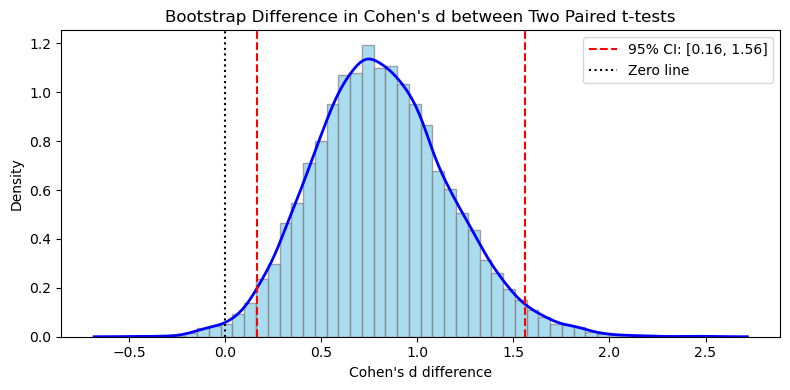

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

plt.figure(figsize=(8, 4))
plt.hist(boot_diff, bins=50, density=True, color='skyblue', edgecolor='gray', alpha=0.7)
sns.kdeplot(boot_diff, color='blue', linewidth=2)

plt.axvline(ci_low, color='red', linestyle='--', label=f'95% CI: [{ci_low:.2f}, {ci_high:.2f}]')
plt.axvline(ci_high, color='red', linestyle='--')
plt.axvline(0, color='black', linestyle=':', label='Zero line')

plt.title("Bootstrap Difference in Cohen's d between Two Paired t-tests")
plt.xlabel("Cohen's d difference")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()